![Image of the book](IMG_9683.jpg)

## Introduction

A pure code based implementation with necessary mathematical formulations included.

### End to End machine Learning

### Performance Measure

<b> <u>Root Mean Square Error </b> </u> $$ RMSE(\textbf{X},h)= \sqrt{\frac{\sum_{i = 1}^{m}{(h{(x^{(i)})- y ^{(i)}}})^2}{m}}$$ $m$- is the number of instances in the datasets you are measuring the RMSE on <br /> $x^{(i)}$- is the vector of all teh feature values of the $i^{th}$ instance in the dataset<br/> $y^{(i)}$- is its label<br/> $\textbf{X}$- is the matrix containing all the feature value of all the instances in the dataset. $x^{(i)}$ transpose is the $i^{th}$-row in $\textbf{X}$ </br> h - is the system's prediction function also called as hypothesis. It is also represented by $\hat{y}$ where $\hat{y}^{(i)} = h(x^{(i)})$</br> $RMSE(\textbf{X},h)$- is the cost function measured on the set of examples using the hypothesis h </br>

<b> <u>Mean absolute Error</b> </u > $$ MAE(\textbf{X},h)= \frac{\sum_{i = 1}^{m}{|h{(x^{(i)})- y ^{(i)}}}|}{m}$$

The difference between these two performance measure is how the norm is caculated. RSME makes use of $\mathcal{l}_2$ norm while MAE makes use of $\mathcal{l}_1$ norm.

#### Download the DATA


In [1]:
import os 
import tarfile
import urllib

Download_Root = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
Housing_Path = os.path.join("Data","housing") # for creating your local directory with DATA as main directory and housign as sub directory
Housing_URL = Download_Root + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url = Housing_URL,housing_path = Housing_Path):
    os.makedirs(housing_path,exist_ok = True)# Will create a directory with name at housing path , exist_ok will check if it already exist , if yes leaving it unaltered
    tgz_path = os.path.join(housing_path,"housing.tgz")
    urllib.request.urlretrieve(housing_url,tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()
    
fetch_housing_data() # call the function

In [2]:
import pandas as pd

def load_housing_data(housing_path = Housing_Path):
    csv_path = os.path.join(housing_path,"housing.csv")
    return pd.read_csv(csv_path)

In [3]:
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [6]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<AxesSubplot: title={'center': 'longitude'}>,
        <AxesSubplot: title={'center': 'latitude'}>,
        <AxesSubplot: title={'center': 'housing_median_age'}>],
       [<AxesSubplot: title={'center': 'total_rooms'}>,
        <AxesSubplot: title={'center': 'total_bedrooms'}>,
        <AxesSubplot: title={'center': 'population'}>],
       [<AxesSubplot: title={'center': 'households'}>,
        <AxesSubplot: title={'center': 'median_income'}>,
        <AxesSubplot: title={'center': 'median_house_value'}>]],
      dtype=object)

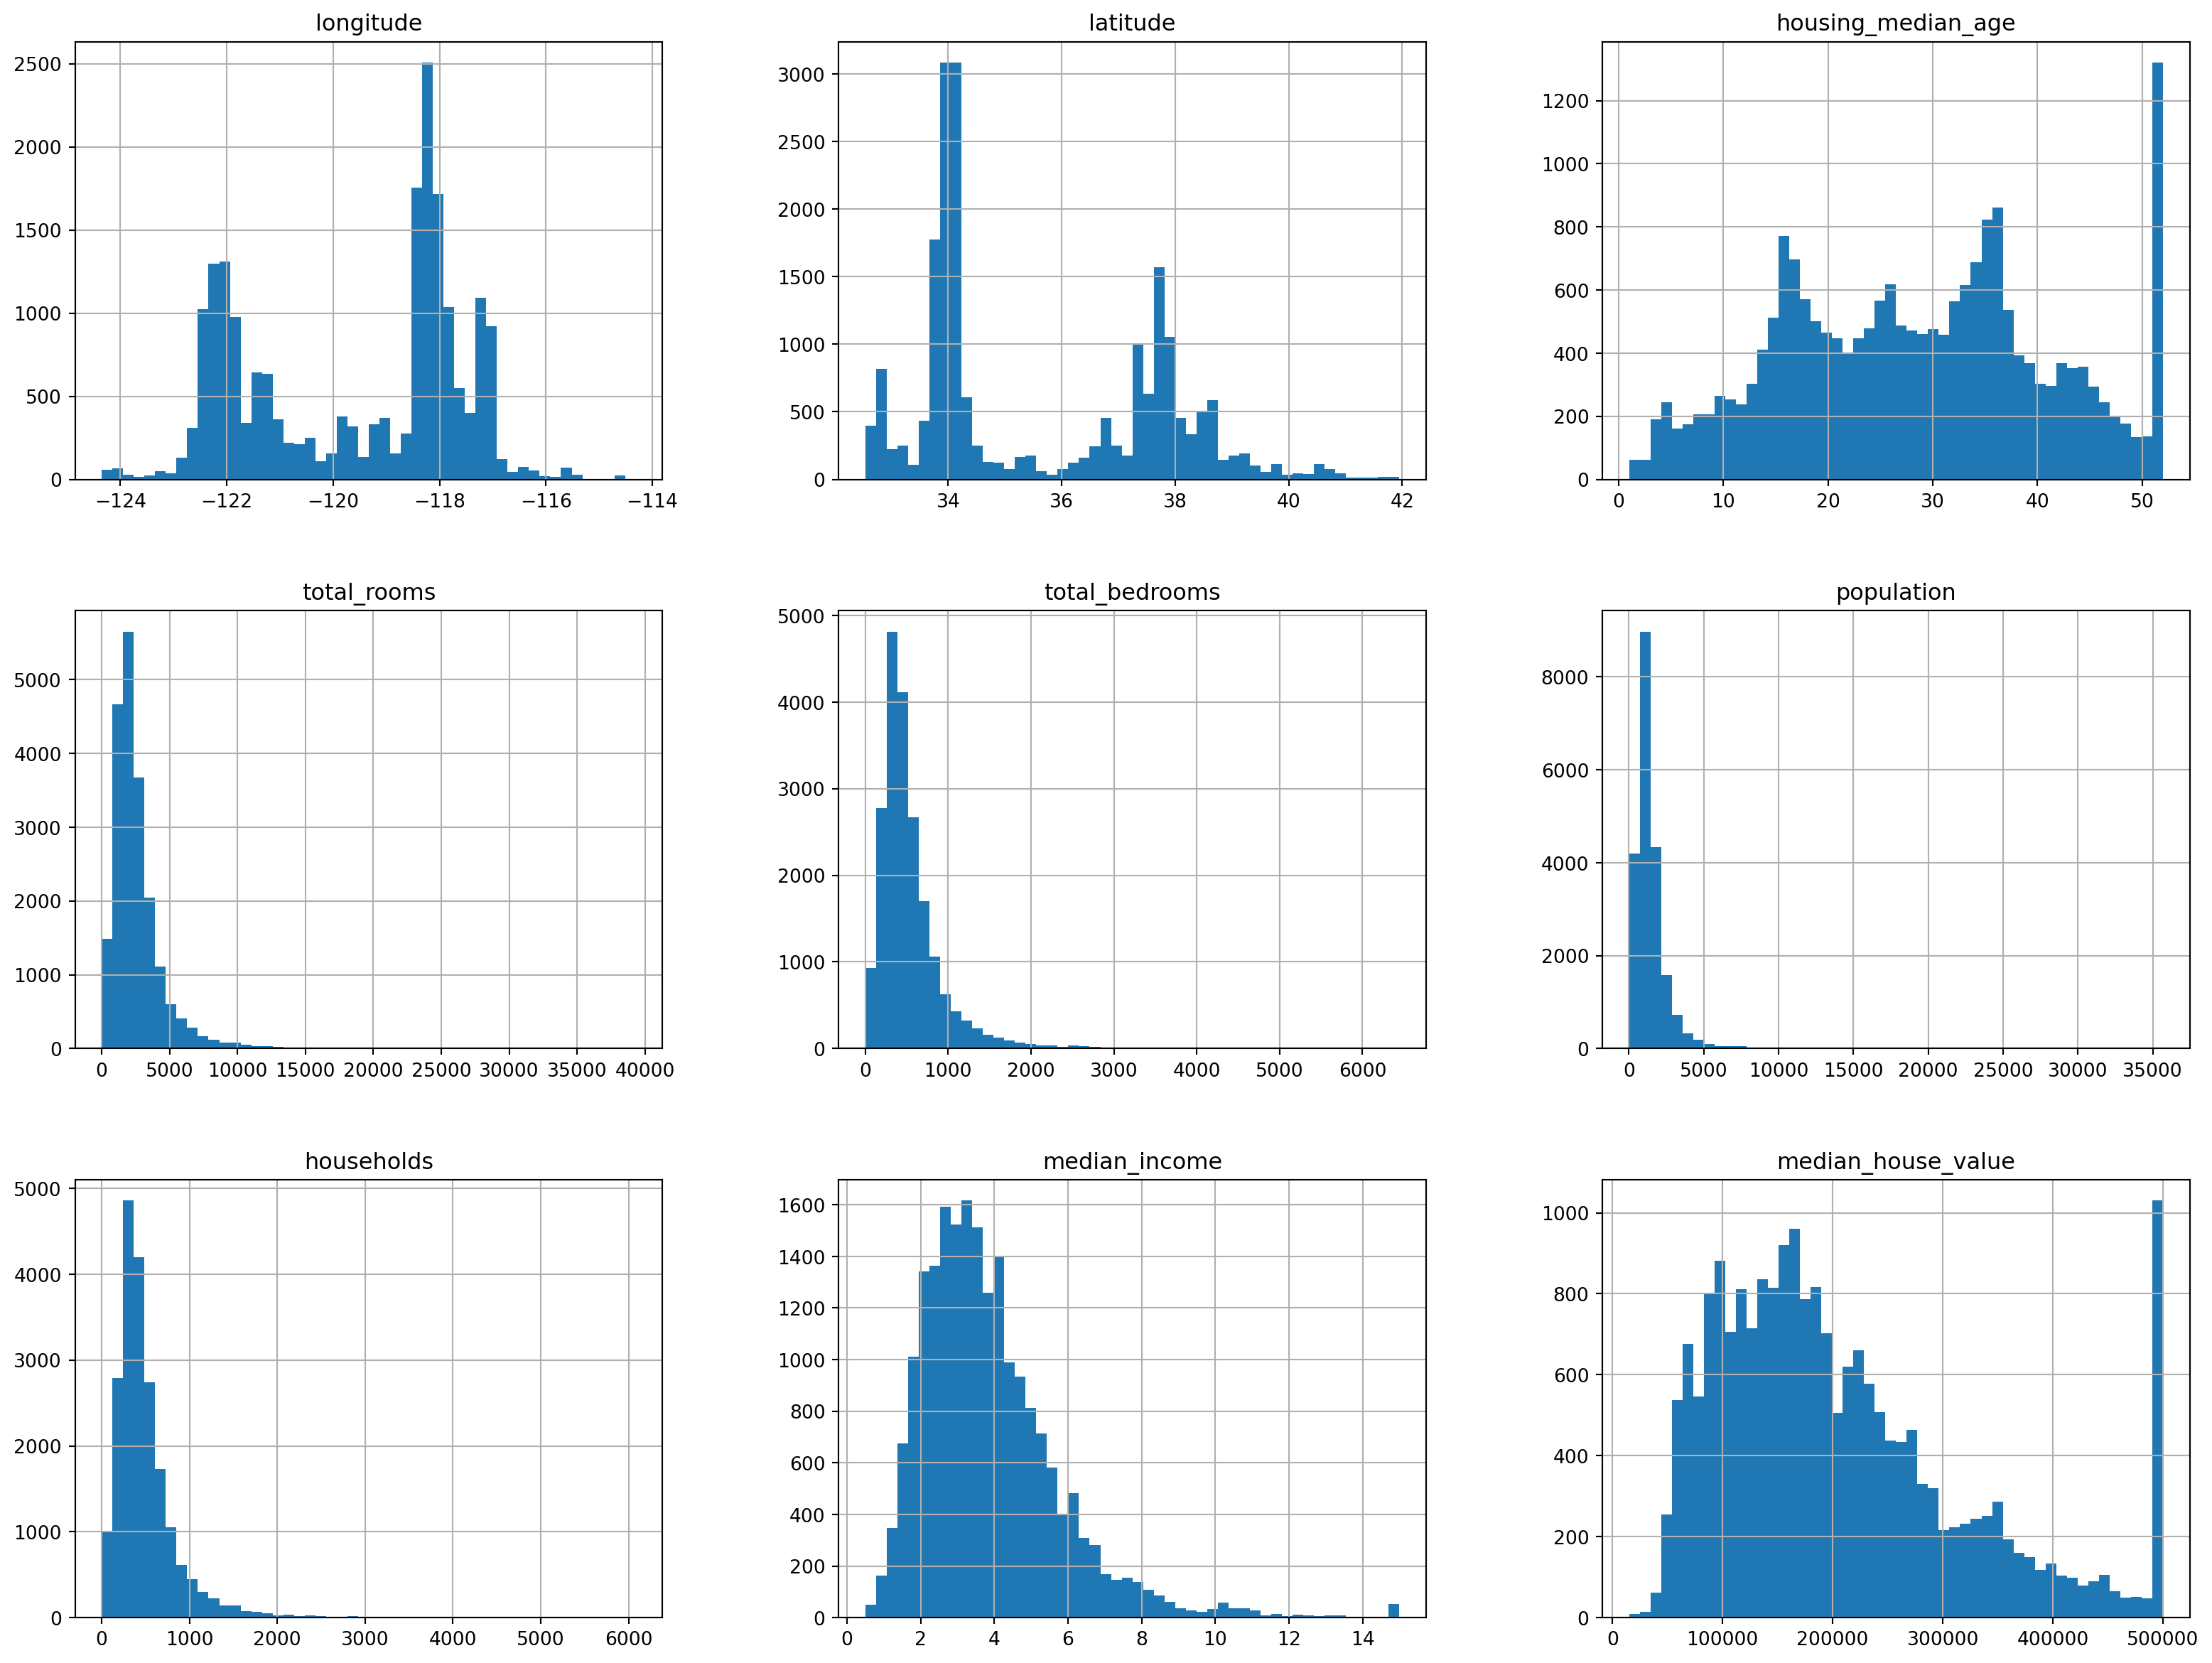

In [7]:
%matplotlib inline 
import matplotlib.pyplot as plt
housing.hist(bins = 50 ,figsize = (20,15))

Few point about the data

-   The median income is capped at 15 for higher median incomes and at 0.5 for lower median incomes. The numbers are denominated in \$10000 i.e 3 in the chart represents 30,000 USD

-   The housing median age and median house value were also capped. Since median house value is our target variable this is a source of a problem.The prediction might never go beyond the capped limit.

-   The attributes have different scales

-   Many of the histograms are tail-heavy. Important to normalize the data as some machine learning algorithims might fail to detect patterns effectively

#### Creating a test set and train set


In [8]:
import numpy as np
np.random.seed(50)# will always give the same test set and train set 
def split_train_test(data,test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data)*test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.loc[train_indices] ,data.loc[test_indices]

train_set , test_set = split_train_test(housing,0.2)
print(len(train_set))
print(len(test_set))

16512
4128
